# Introduction
## What is power creep?
According to an article on plarium.com, power creep is "when new elements are introduced into a game, with increased strength or abilities, making the existing elements much weaker or even useless." This ultimately results in a game where older elements seem underpowered and outclassed among the new elements. Power creep is a common practice in many competitive games, as it helps retention and keeps people interested in a game. So how does this factor in the Pokemon TCG? Let's look at an example of this in the form of the series mascot: Pikachu.

\begin{figure}[h]
\centering
\hspace*{0.05\textwidth} % left margin
\begin{minipage}{0.3\textwidth}
    \centering
    \includegraphics[width=\linewidth]{assets/pikachu_base.jpg}
    \caption*{Pikachu Base}
\end{minipage}
\hspace*{0.05\textwidth} % space between images
\begin{minipage}{0.3\textwidth}
    \centering
    \includegraphics[width=\linewidth]{assets/pikachu_modern.jpg}
    \caption*{Pikachu Modern}
\end{minipage}
\hspace*{0.05\textwidth} % right margin
\end{figure}


Pictured above on the left is the very first Pikachu card ever printed, all the way back in 1999. On the right, we have the most recent Pikachu card printed, being printed in 2024. In addition to being flashier and shinier, the Pikachu on the right has five times the amount of health as the Pikachu on the left, and it even does ten times the damage. What happened between 1995 and 2024 to trigger such a drastic change? This question is what inspired me to take a deeper dive into the history of the Pokemon TCG and its cards to further understand how power creep could have such a big impact on these cards.

\pagebreak

## Importing our libraries
The following code is run to import the necessary libraries used to explore the data:

In [253]:
# Command for conversion [remove later]
# jupyter nbconvert Power\ Creep\ in\ the\ Pokemon\ TCG.ipynb --to pdf --PDFExporter.extra_paths="./assets"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing our dataset
The dataset I will be using for this study was taken from <a href="https://www.kaggle.com/datasets/adampq/pokemon-tcg-all-cards-1999-2023">kaggle.com</a>. The data is then imported with the code below:

In [254]:
df = pd.read_csv("dataset/pokemon-tcg-data-master 1999-2023.csv")

## Interpreting the dataset
We can then print the head of the dataset to get acquainted with the dataset and all of its fields with the following code:

In [255]:
pd.set_option('display.max_columns', None)
df.head(1)

,id,set,series,publisher,generation,release_date,artist,name,set_num,types,supertype,subtypes,level,hp,evolvesFrom,evolvesTo,abilities,attacks,weaknesses,retreatCost,convertedRetreatCost,rarity,flavorText,nationalPokedexNumbers,legalities,resistances,rules,regulationMark,ancientTrait
0,base1-1,Base,Base,WOTC,First,1/9/1999,Ken Sugimori,Alakazam,1,['Psychic'],Pokémon,['Stage 2'],42,80.0,Kadabra,NaN,"[{'name': 'Damage Swap', 'text': ""As often as ...","[{'name': 'Confuse Ray', 'cost': ['Psychic', '...","[{'type': 'Psychic', 'value': '×2'}]","['Colorless', 'Colorless', 'Colorless']",3.0,Rare Holo,Its brain can outperform a supercomputer. Its ...,[65],{'unlimited': 'Legal'},NaN,NaN,NaN,NaN


Let's also break down what all of the data in the dataset means.

- `id` (string)
    - Each ID contains two pieces of information, split by a hyphen
        - The name of the set the card originates from
        - The ID number of the card within the set
- `set` (string)
    - The name of set the card originates from
- `series` (string)
    - The name of the series the card originates from. Each series contains multiple sets, and each series is generally split up by which generation of Pokemon games the series took place during
- `publisher` (string)
    - The name of the publisher that published the card
- `generation` (string)
    - The generation of Pokemon games that the series lines up with
- `release_date` (date)
    - The date the card was released
- `artist`
    - The artist the illustrated the card art
- `name`
    - The name of the card.
- `set_num`
    - The ID number of the card within the set it is in
- `types`
    - A list of types that the card is a part of.
- `supertype`
    - All cards are classified by one of three supertypes: Pokemon, Trainer, and Energy
- `subtypes`
    - Each supertype of card can have one or more subtypes
        - Pokemon subtypes represent their evolution stage, and are mostly either basic, stage 1, or stage 2
        - Trainer subtypes represent which type of trainer the card is, and can be supporter, item, tool, or stadium
        - Energy subtypes represent whether or not they are basic or special
- `level`
    - Whenever applicable, the card's level represents what numeric level is printed on the card.
- `hp`
    - Whenever applicable, this is the card's health points. Applicable to Pokemon and some select trainers
- `evolvesFrom`
    - Whenever applicable, this represents which card the Pokemon has to be placed on top on in order to be put in play. Basic pokemon can be put in play right away, whereas Stage 1's must be placed on top of Basics, and Stage 2's need to be placed on top of Stage 1's
- `evolvesTo`
    - Whenever applicable, this represents which cards can be placed on top of this card in order to evolve the Pokemon.
- `abilities`
    - Whenever applicable, this is the card's ability, in the form of a dictionary. Abilities were previously referred to as both Poke-Bodies and Poke-Powers, which are also in this field.
- `attacks`
    - Whenever applicable, this is all of the attacks listed on the card. Each attack has its name, attack energy cost, and its damage and/or attack effects.
- `weaknesses`
    - Whenever applicable, this is any weaknesses the Pokemon has and how much more damage an attack would do to the card if it matches the weakness type.
- `retreatCost`
    - Whenever applicable, this is the amount of attached energy required for an active Pokemon to spend to retreat from the active to the bench. This field is in the form of an array of how much energy is required.
- `convertedRetreatCost`
    - Whenever applicable, this is the amount of attached energy required for an active Pokmeon to spend to retreat from the active to the bench. This field is in the form of a number.
- `rarity`
    - This is the rarity of the card
- `flavorText`
    - This is simply text on the bottom of the card, added for extra world building and context on the card. The flavor text has no impact on gameplay
- `nationalPokedexNumbers`
    - When applicable, this is the Pokedex ID number that the Pokemon on the card has in the Pokemon games
- `legalities`
    - This field contains all of the formats that the card is legal in
- `resistances`
    - Whenever applicable, this is any resistances the Pokemon has and how much damage is reduced from an attack if it matches the resistance type.
- `rules`
    - Whenever applicable, these are extra rules or restrictions placed an how a card is played in the game
- `regulationMark`
    - Whenever applicable, this represents what regulation the card is legal in
- `ancientTrait`
    - Whenever applicable, these are extra traits that a Pokemon have, usually postive attributes that help


## Data Trimming

This is a lot of data just for a Pokemon card, but not all of it will be required for our analysis. Because we are doing an analysis purely on how cards operate in a game and how much power creep has affected them over time, anything that does not directly interact with gameplay or represent the time period the card was released will not be needed for analysis. The given fields that are not related to gameplay are as follows:

- `publisher`
- `generation`
- `artist`
- `level`
- `flavorText`
- `nationalPokedexNumbers`
- `legalities`

Also, we also only need one of `retreatCost` and `convertedRetreatCost`, as they are two different fields that represent the same thing, and because `convertedRetreatCost` will be easier to work with, we can also cut `retreatCost`.

We can use the following code to trim the unnecessary fields out of the dataset:

In [256]:
df = df.drop([
    'publisher',
    'generation',
    'artist',
    'level',
    'retreatCost',
    'flavorText', 
    'nationalPokedexNumbers',
    'legalities'
], axis=1)

This is what each card will look like after trimming the data:

In [257]:
df.head(1)

,id,set,series,release_date,name,set_num,types,supertype,subtypes,hp,evolvesFrom,evolvesTo,abilities,attacks,weaknesses,convertedRetreatCost,rarity,resistances,rules,regulationMark,ancientTrait
0,base1-1,Base,Base,1/9/1999,Alakazam,1,['Psychic'],Pokémon,['Stage 2'],80.0,Kadabra,NaN,"[{'name': 'Damage Swap', 'text': ""As often as ...","[{'name': 'Confuse Ray', 'cost': ['Psychic', '...","[{'type': 'Psychic', 'value': '×2'}]",3.0,Rare Holo,NaN,NaN,NaN,NaN


# Data Analysis



The first thing we should look at to see if power creep has taken place in the Pokemon TCG would be the HP stat on cards, and how it has changed over time. We can do this by taking the average HP for every set of the TCG and plotting them all to see how it increases over time.

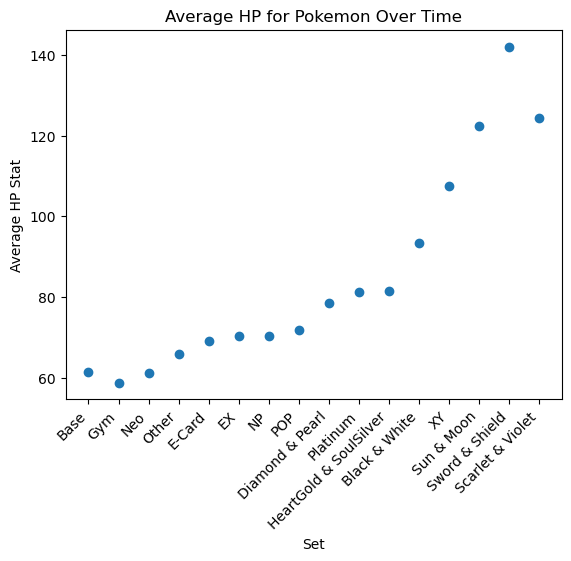

['Base', 'Gym', 'Neo', 'Other', 'E-Card', 'EX', 'NP', 'POP', 'Diamond & Pearl', 'Platinum', 'HeartGold & SoulSilver', 'Black & White', 'XY', 'Sun & Moon', 'Sword & Shield', 'Scarlet & Violet']
['Base', 'Gym', 'Neo', 'Other', 'E-Card', 'EX', 'NP', 'POP', 'Diamond & Pearl', 'Platinum', 'HeartGold & SoulSilver', 'Black & White', 'XY', 'Sun & Moon', 'Sword & Shield', 'Scarlet & Violet']


In [258]:
Sets = df['series'].astype(str).unique().tolist()
AverageHpPerSet = df.groupby('series', sort=False)['hp'].mean().reset_index()['hp'].tolist()

plt.xlabel('Set')
plt.xticks(rotation=45, ha='right')  # ha = horizontal alignment
plt.ylabel('Average HP Stat')
plt.title('Average HP for Pokemon Over Time')

plt.scatter(Sets, AverageHpPerSet, label='HP Over Time')
plt.show()

print(df['series'].astype(str).unique().tolist())
print(Sets)
